In [1]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
# Reading csv file into pandas framework
property_dataSet = pd.read_csv("2020-2021_Assessment_Roll_20240205.csv")
property_data = pd.DataFrame(property_dataSet)

## Statistic about the dataset

In [3]:
# Printing shape of dataset
print("Database Shape : ")
print(property_data.shape)

Database Shape : 
(93721, 51)


In [4]:
# Printing information of dataset
print("Database Information : ")
print(property_data.info())

Database Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93721 entries, 0 to 93720
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SBL                         93721 non-null  object 
 1   Tax District                93721 non-null  int64  
 2   Print Key                   93721 non-null  object 
 3   Front                       93721 non-null  float64
 4   Depth                       93721 non-null  float64
 5   Property Class              93721 non-null  int64  
 6   Property Class Description  93721 non-null  object 
 7   Previous Property Class     93498 non-null  float64
 8   Owner1                      93721 non-null  object 
 9   Owner2                      24243 non-null  object 
 10  Previous Owner              71440 non-null  object 
 11  Mail1                       4032 non-null   object 
 12  Mail2                       7030 non-null   object 
 13  Mail3  

In [5]:
# Printing description of dataset
print("Database Description : ")
property_data.describe()

Database Description : 


,Tax District,Front,Depth,Property Class,Previous Property Class,House Number,Zipcode,Zipcode Extension,Deed Book,Deed Page,...,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Census Tract,Census Block Group,Census Block,Latitude,Longitude
count,93721.000000,93721.000000,93721.000000,93721.000000,93498.000000,93721.000000,93679.000000,0.0,93446.000000,93485.000000,...,93721.000000,93721.000000,93721.000000,93721.000000,93721.000000,92070.000000,93462.000000,93507.000000,93524.000000,93524.000000
mean,147008.334407,47.409736,119.603733,263.060467,262.937111,344.458830,14211.799528,NaN,10725.366886,4076.734011,...,1.272284,0.109058,2.950150,1.154482,1.047481,54616.299815,2.476547,2482.303582,42.908585,-78.844495
std,3.980641,337.186021,94.677661,98.520957,98.530442,1899.244308,5.034882,NaN,1424.599835,3307.465912,...,0.846855,0.394779,2.160818,0.882815,0.794217,47052.786526,1.280149,1279.369714,0.032219,0.029971
min,147001.000000,0.000000,0.000000,210.000000,210.000000,0.000000,14200.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,1.000000,1000.000000,42.828198,-78.909804
25%,147005.000000,30.000000,102.000000,210.000000,210.000000,64.000000,14208.000000,NaN,10917.000000,758.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27023.000000,1.000000,1013.000000,42.890074,-78.868447
50%,147009.000000,33.000000,115.000000,220.000000,220.000000,153.000000,14212.000000,NaN,11137.000000,3748.000000,...,1.500000,0.000000,3.000000,1.000000,1.000000,43006.000000,2.000000,2010.000000,42.911867,-78.840836
75%,147011.000000,40.000000,132.000000,311.000000,311.000000,364.000000,14215.000000,NaN,11283.000000,6834.000000,...,2.000000,0.000000,4.000000,2.000000,2.000000,61004.000000,3.000000,3011.000000,42.935089,-78.818544
max,147089.000000,97147.000000,15900.000000,971.000000,971.000000,99999.000000,14228.000000,NaN,99999.000000,99999.000000,...,3.300000,9.000000,12.000000,8.000000,3.000000,171005.000000,7.000000,7006.000000,42.965959,-78.798927


## Handle missing entries

In [6]:
# Calculating the number of missing values
missing_values_count = property_data.isnull().sum()
print("Number of missing values in each column:(Before)")
print(missing_values_count)

Number of missing values in each column:(Before)
SBL                               0
Tax District                      0
Print Key                         0
Front                             0
Depth                             0
Property Class                    0
Property Class Description        0
Previous Property Class         223
Owner1                            0
Owner2                        69478
Previous Owner                22281
Mail1                         89689
Mail2                         86691
Mail3                             6
Mail4                             0
House Number                      0
Street                            0
Address                           0
City                              0
State                             0
Zipcode                          42
Zipcode Extension             93721
Deed Book                       275
Deed Page                       236
Deed Date                         0
Roll                              0
Land Value     

In [7]:
# Handling missing values
# Drop Column
property_data = property_data.dropna(subset=['Census Tract', 'Zipcode','Year Built'])
# Drow Rows
property_data = property_data.drop(columns=['Property Class Description','Zipcode Extension', 'Mail1', 'Mail2', 'Owner2','Previous Owner','Deed Date','Mail3','Mail4','Census Block Group', 'Census Block', 
                                            'Neighborhood','Latitude', 'Longitude', 'Location'], axis=1)
print(property_data.shape)
property_data.info()

(66975, 36)
<class 'pandas.core.frame.DataFrame'>
Index: 66975 entries, 0 to 93720
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SBL                      66975 non-null  object 
 1   Tax District             66975 non-null  int64  
 2   Print Key                66975 non-null  object 
 3   Front                    66975 non-null  float64
 4   Depth                    66975 non-null  float64
 5   Property Class           66975 non-null  int64  
 6   Previous Property Class  66975 non-null  float64
 7   Owner1                   66975 non-null  object 
 8   House Number             66975 non-null  int64  
 9   Street                   66975 non-null  object 
 10  Address                  66975 non-null  object 
 11  City                     66975 non-null  object 
 12  State                    66975 non-null  object 
 13  Zipcode                  66975 non-null  float64
 14  Deed Book      

In [8]:
# Replace values with mean value
specific_columns = ['Year Built','Building Style', 'Heat Type', 'Basement Type']

for column in specific_columns:
    property_data[column].fillna(property_data[column].mean(), inplace=True)

print("Database Description : ")
property_data.describe()

Database Description : 


,Tax District,Front,Depth,Property Class,Previous Property Class,House Number,Zipcode,Deed Book,Deed Page,Roll,...,Overall Condition,Building Style,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Census Tract
count,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66928.000000,66958.000000,66975.000000,...,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000,66975.000000
mean,147008.836879,36.904295,118.613904,217.628249,217.690302,239.312699,14212.455125,10806.363301,4153.502315,1.038567,...,2.977589,7.651795,2.074042,3.610830,1.760158,0.151221,4.080627,1.595364,1.448436,51861.676865
std,3.594795,13.718179,39.529448,22.174361,22.441788,307.218676,5.007613,1161.285812,3324.978150,0.518153,...,0.360860,1.830022,0.417557,0.802699,0.365213,0.458288,1.357503,0.608511,0.538755,43285.237684
min,147001.000000,0.000000,0.000000,210.000000,210.000000,1.000000,14200.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1101.000000
25%,147007.000000,30.000000,105.000000,210.000000,210.000000,58.000000,14208.000000,10934.000000,817.000000,1.000000,...,3.000000,8.000000,2.000000,4.000000,1.500000,0.000000,3.000000,1.000000,1.000000,27024.000000
50%,147009.000000,33.000000,115.000000,210.000000,210.000000,131.000000,14213.000000,11156.000000,3856.500000,1.000000,...,3.000000,8.000000,2.000000,4.000000,2.000000,0.000000,4.000000,2.000000,1.000000,44013.000000
75%,147011.000000,40.000000,132.000000,220.000000,220.000000,306.000000,14215.000000,11290.000000,6930.750000,1.000000,...,3.000000,8.000000,2.000000,4.000000,2.000000,0.000000,5.000000,2.000000,2.000000,58024.000000
max,147014.000000,352.650000,744.180000,642.000000,682.000000,3193.000000,14225.000000,99459.000000,99716.000000,8.000000,...,5.000000,17.000000,4.000000,4.000000,3.300000,9.000000,12.000000,8.000000,3.000000,171005.000000


## Handle mismatched string formats

In [9]:
# Convert all string values to lowercase
property_data = property_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
property_data

,SBL,Tax District,Print Key,Front,Depth,Property Class,Previous Property Class,Owner1,House Number,Street,...,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract
0,1016500006006110,147012,101.65-6-6.11,45.00,107.30,210,210.0,jones gloria,97,wex,...,2.0,3.0,1.5,0,3,1.0,1,lovejoy,district c,30002.0
7,1013000001014000,147011,101.30-1-14,30.00,140.00,220,220.0,grayson mary,24,carl,...,2.0,3.0,1.5,0,5,2.0,2,masten,district e,34002.0
16,1124000002030000,147012,112.40-2-30,60.00,125.00,220,220.0,luke florence,203,central,...,2.0,2.0,2.0,0,5,2.0,2,lovejoy,district c,24005.0
19,1124200005043000,147012,112.42-5-43,30.00,134.00,210,210.0,porzio anthony l & w,217,gold,...,3.0,4.0,2.0,1,4,1.1,1,lovejoy,district c,24003.0
31,1238100004005000,147014,123.81-4-5,35.00,110.00,220,220.0,delaney l f & w,95,geary,...,2.0,4.0,2.0,0,6,2.0,2,south,district a,10005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93715,0906700002019000,147010,90.67-2-19,30.00,124.00,220,220.0,rd holdings wny llc,119,roma,...,2.0,4.0,1.7,0,4,2.0,2,university,district e,41004.0
93716,0995200006006000,147002,99.52-6-6,29.00,137.42,210,210.0,powell becky,95,seventeenth,...,2.0,4.0,1.7,0,4,1.0,1,niagara,district b,67012.0
93717,0995900004009000,147002,99.59-4-9,31.42,149.00,210,210.0,torina edward v,306,fourteenth,...,3.0,3.0,1.3,0,4,1.0,1,niagara,district b,69012.0
93718,0908200001043000,147011,90.82-1-43,60.00,102.00,220,220.0,city of buffalo perfecting tit,253,hagen,...,2.0,4.0,2.0,0,4,2.0,2,lovejoy,district e,37001.0


## Handle outliers

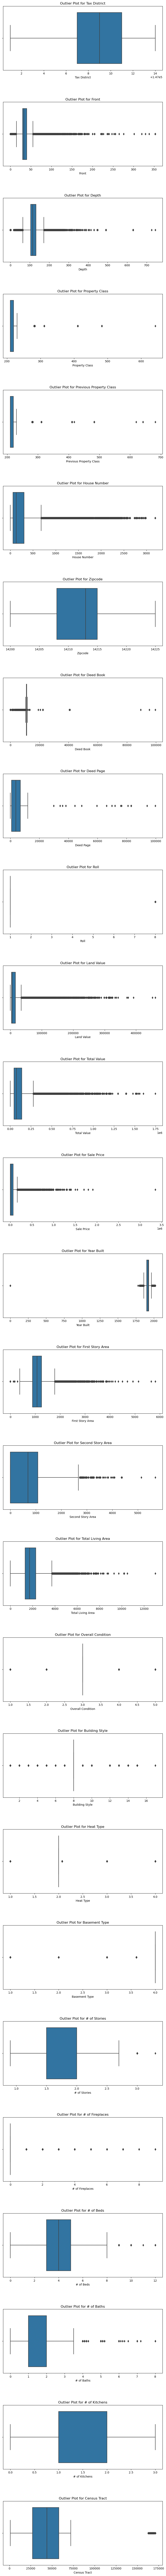

In [10]:
# Plotting outlier graphs for each numerical column
numerical_columns = property_data.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(x=property_data[column], ax=ax)
    ax.set_title(f'Outlier Plot for {column}')
    ax.set_xlabel(column)

plt.show()

In [11]:
# remove_outliers function
def remove_outliers(data_frame, field_name):
    q1 = np.percentile(data_frame.loc[:, field_name], 25)
    q3 = np.percentile(data_frame.loc[:, field_name], 75)

    iqr_value = 1.5 * (q3 - q1)
    
    upper_bound = q3 + 1.5 * iqr_value
    lower_bound = q1 - 1.5 * iqr_value
    
    index_choose_lower = data_frame[(data_frame.loc[:, field_name] < lower_bound)].index
    data_frame.drop(index_choose_lower, inplace=True)

    index_choose_upper = data_frame[(data_frame.loc[:, field_name] > upper_bound)].index
    data_frame.drop(index_choose_upper, inplace=True)

remove_outliers(property_data, 'Sale Price')
remove_outliers(property_data, 'Land Value')
remove_outliers(property_data, 'Second Story Area')

In [12]:
# Calculating the number of missing values
missing_values_count = property_data.isnull().sum()

print("Number of missing values in each column:(After)")
print(missing_values_count)

Number of missing values in each column:(After)
SBL                         0
Tax District                0
Print Key                   0
Front                       0
Depth                       0
Property Class              0
Previous Property Class     0
Owner1                      0
House Number                0
Street                      0
Address                     0
City                        0
State                       0
Zipcode                     0
Deed Book                  43
Deed Page                  17
Roll                        0
Land Value                  0
Total Value                 0
Sale Price                  0
Year Built                  0
First Story Area            0
Second Story Area           0
Total Living Area           0
Overall Condition           0
Building Style              0
Heat Type                   0
Basement Type               0
# of Stories                0
# of Fireplaces             0
# of Beds                   0
# of Baths            

In [13]:
# Convert float values to integers
property_data['Overall Condition'] = property_data['Overall Condition'].astype(int)
property_data['Building Style'] = property_data['Building Style'].astype(int)
property_data['Heat Type'] = property_data['Heat Type'].astype(int)
property_data['Basement Type'] = property_data['Basement Type'].astype(int)

## Data visualization

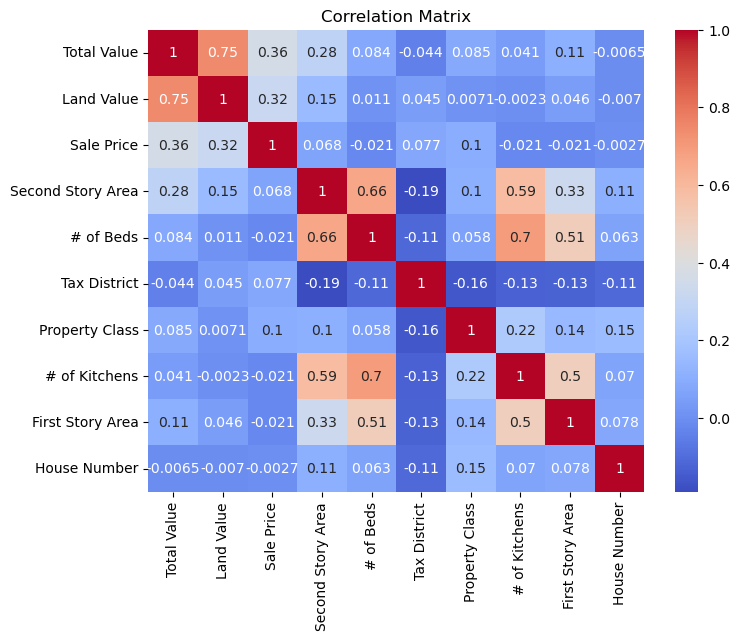

In [14]:
# Correlation matrix 
plt.figure(figsize=(8, 6))
numeric_columns = property_data[['Total Value', 'Land Value', 'Sale Price', 'Second Story Area', '# of Beds', 'Tax District', 'Property Class', '# of Kitchens', 'First Story Area', 'House Number']]
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
#print(correlation_matrix)

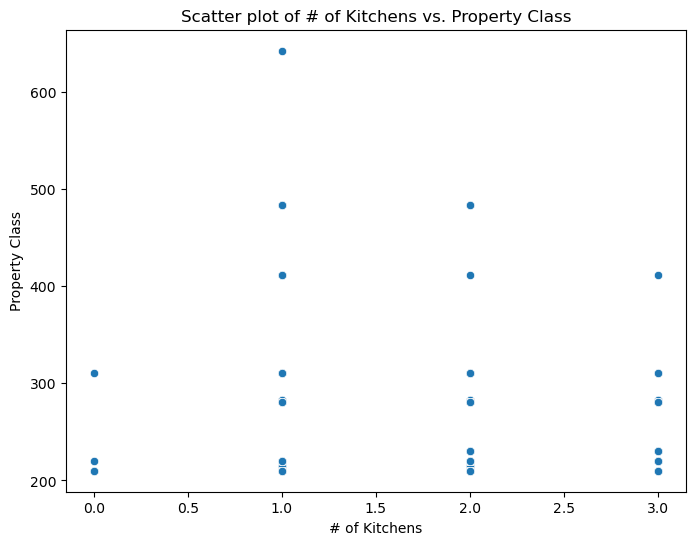

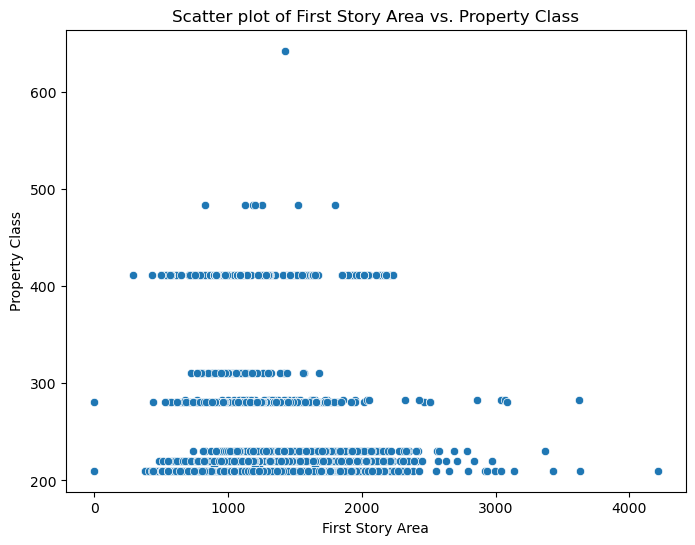

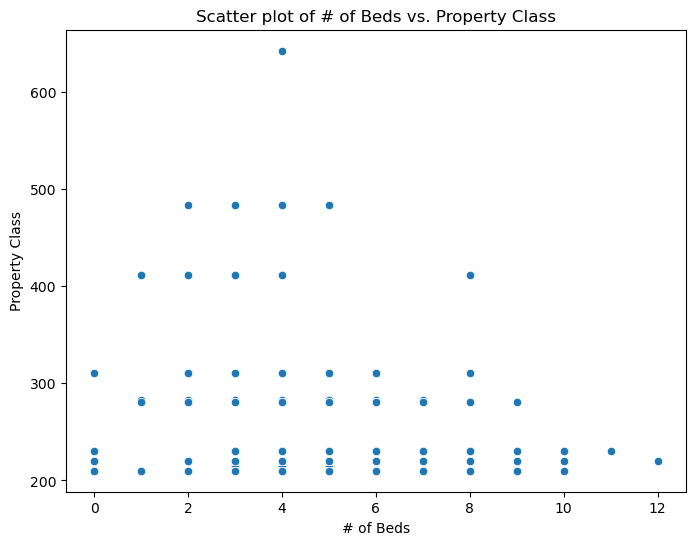

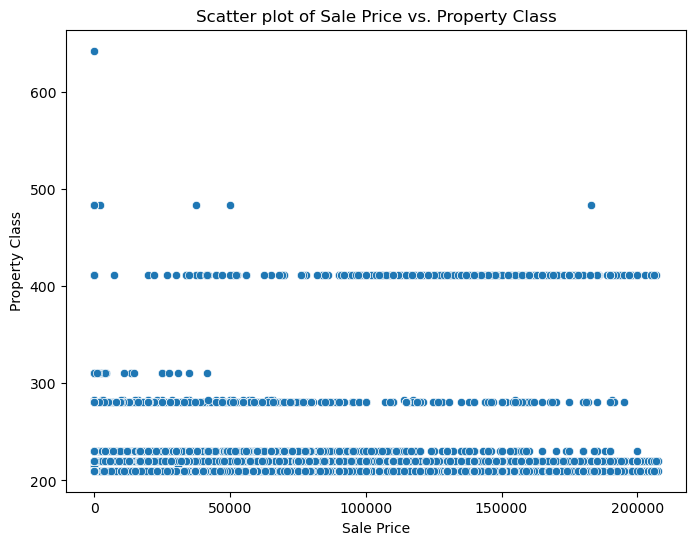

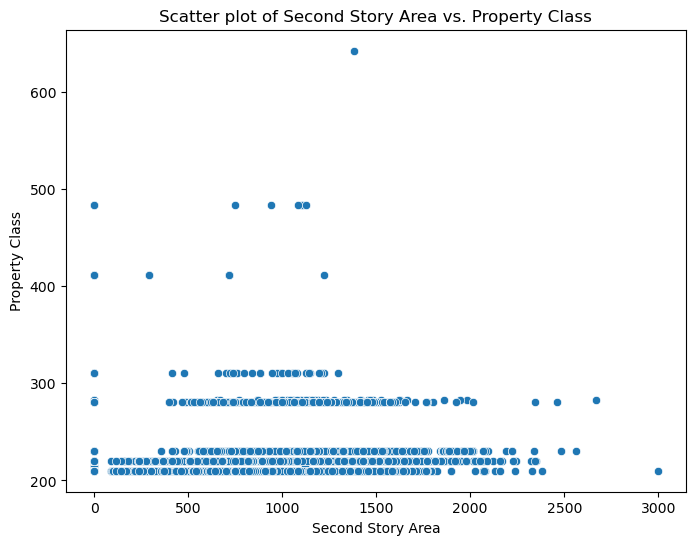

In [15]:
target_variable = 'Property Class'

# Scatter plot
Y = property_data['Property Class']
numerical_features = ['# of Kitchens', 'First Story Area', '# of Beds', 'Sale Price', 'Second Story Area']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=property_data[feature], y=Y)
    plt.title(f"Scatter plot of {feature} vs. {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


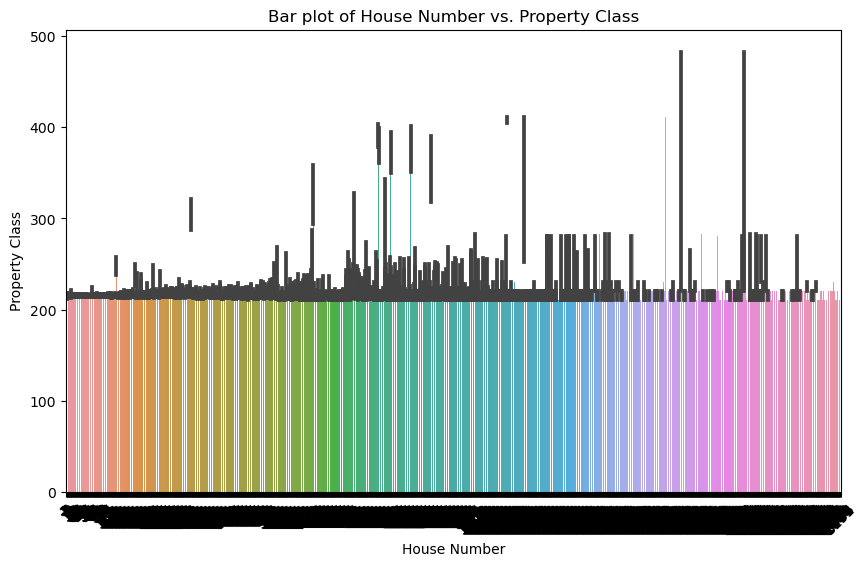

In [16]:
# Define target_variable and Y
target_variable = 'Property Class'
Y = property_data[target_variable]

# Bar plot
categorical_feature = 'House Number'
plt.figure(figsize=(10, 6))
sns.barplot(x=property_data[categorical_feature], y=Y)
plt.title(f"Bar plot of {categorical_feature} vs. {target_variable}")
plt.xlabel(categorical_feature)
plt.ylabel(target_variable)
plt.xticks(rotation=45)
plt.show()


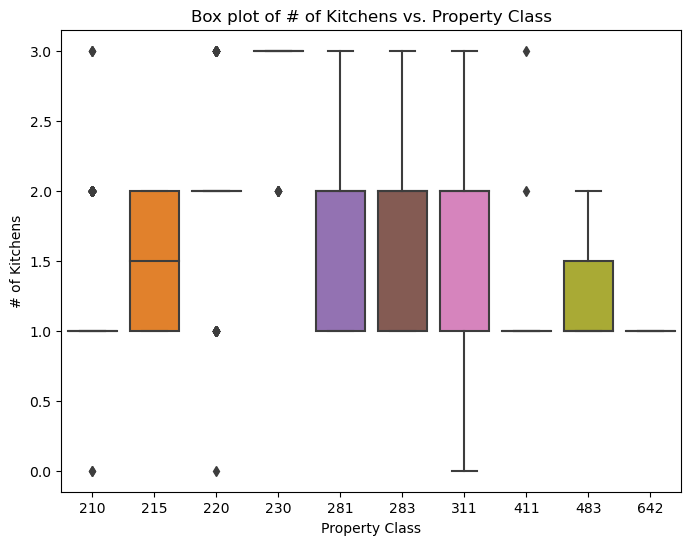

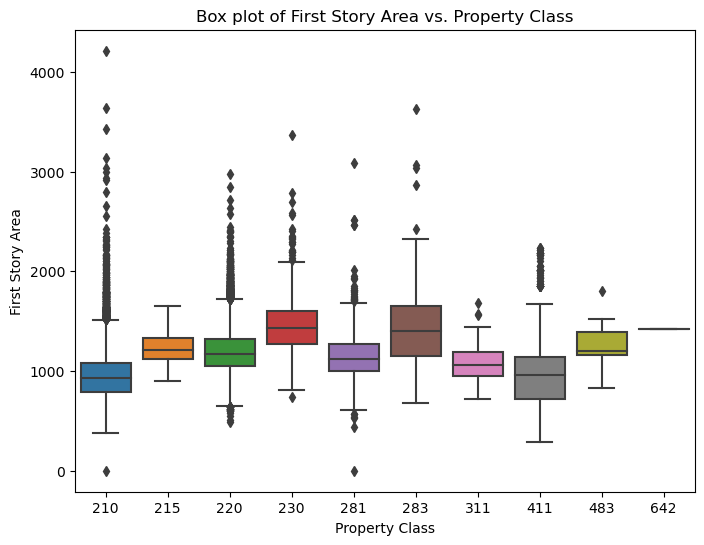

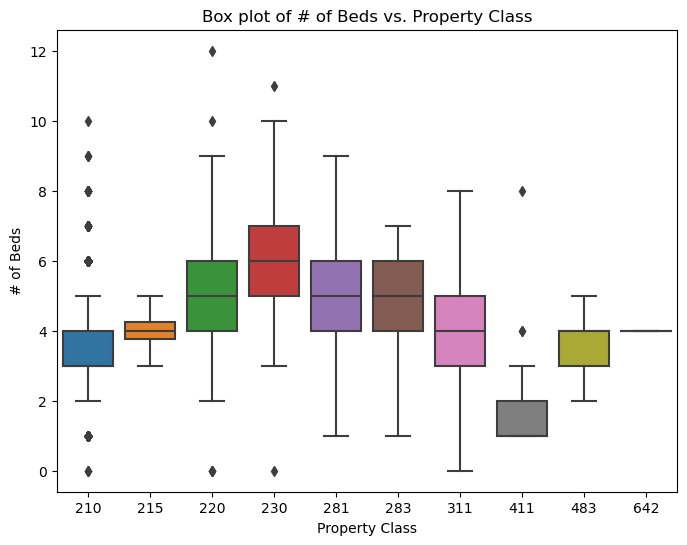

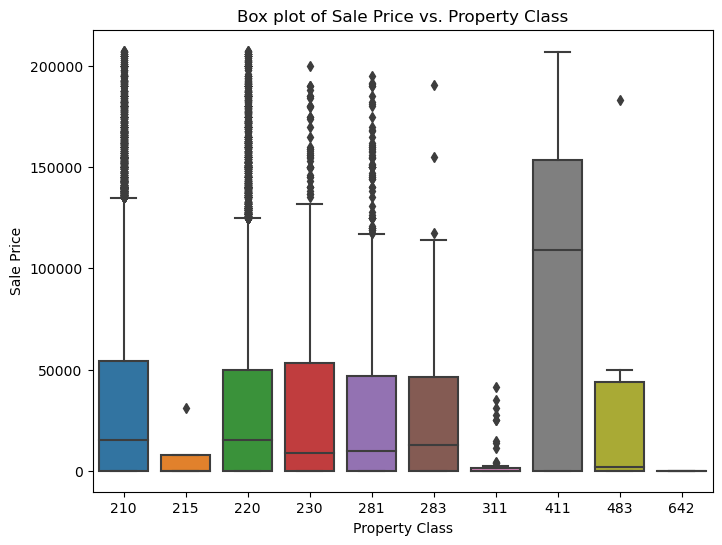

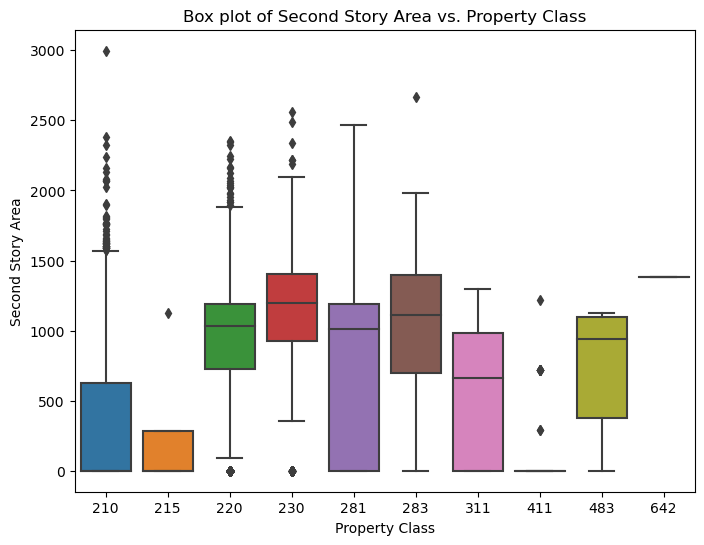

In [17]:
target_variable = 'Property Class'
Y = property_data[target_variable]

# Box plot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Y, y=property_data[feature])
    plt.title(f"Box plot of {feature} vs. {target_variable}")
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

C:\Users\shrig\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


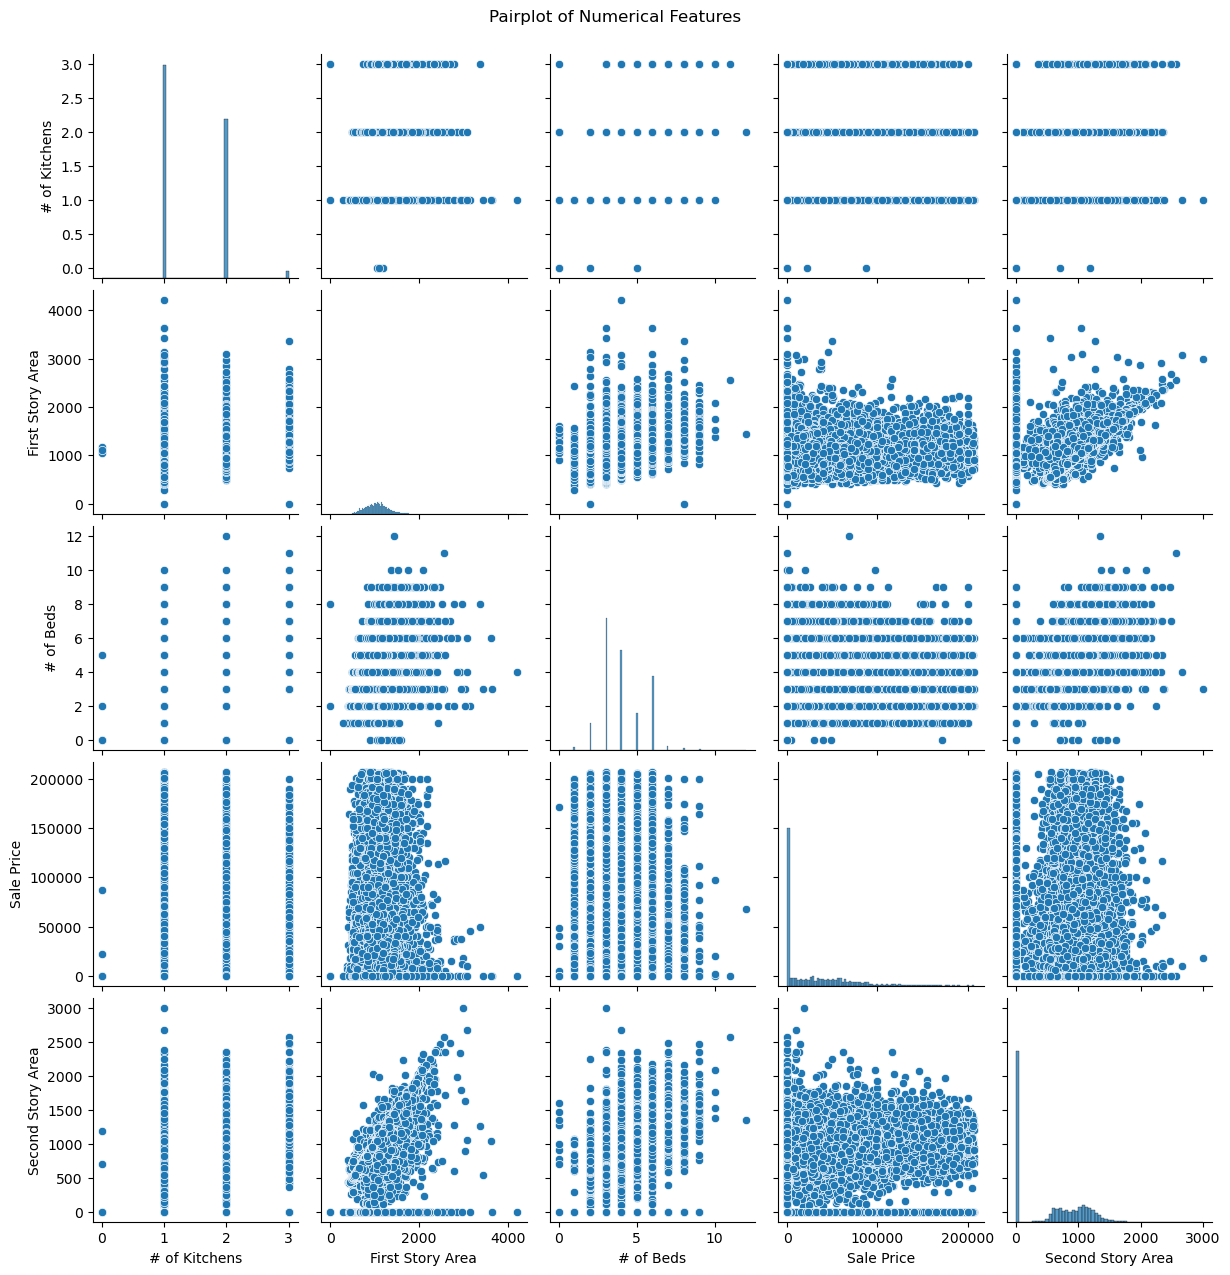

In [18]:
# Pairplot
sns.pairplot(property_data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## One-hot encoding

In [19]:
# One-hot encoding function
def one_hot_encode(data_frame, columns):
    # Iterate over each column to be encoded
    for column in columns:
        # Perform one-hot encoding for the current column
        encoded_cols = pd.get_dummies(data_frame[column], prefix=column, drop_first=True)
        # Concatenate the encoded columns to the original DataFrame
        data_frame = pd.concat([data_frame, encoded_cols], axis=1)
        # Drop the original column after encoding
        data_frame.drop(column, axis=1, inplace=True)
    return data_frame

# List of columns to encode
columns_to_encode = ['Council District', 'Police District']

# Perform one-hot encoding
property_data_encoded = one_hot_encode(property_data.copy(), columns_to_encode)

# Display the encoded DataFrame
print(property_data_encoded.head())

                 SBL  Tax District      Print Key  Front  Depth  \
0   1016500006006110        147012  101.65-6-6.11   45.0  107.3   
7   1013000001014000        147011    101.30-1-14   30.0  140.0   
16  1124000002030000        147012    112.40-2-30   60.0  125.0   
19  1124200005043000        147012    112.42-5-43   30.0  134.0   
31  1238100004005000        147014     123.81-4-5   35.0  110.0   

    Property Class  Previous Property Class                Owner1  \
0              210                    210.0          jones gloria   
7              220                    220.0          grayson mary   
16             220                    220.0         luke florence   
19             210                    210.0  porzio anthony l & w   
31             220                    220.0       delaney l f & w   

    House Number   Street  ... Council District_masten  \
0             97      wex  ...                   False   
7             24     carl  ...                    True   
16      

In [20]:
# uncorrelated or unrelated features
columns_to_drop = ['Total Value', 'Land Value', 'Tax District']

property_data.drop(columns=columns_to_drop, inplace=True)

## Normalization

In [21]:
# Function to normalize columns
def normalize_columns(data_frame, field_name):
    column_name = data_frame[field_name]
    max_value = column_name.max()
    min_value = column_name.min()
    data_frame[field_name] = np.divide((column_name - min_value), (max_value - min_value))

normalize_columns(property_data, 'Total Living Area')

property_data

,SBL,Print Key,Front,Depth,Property Class,Previous Property Class,Owner1,House Number,Street,Address,...,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract
0,1016500006006110,101.65-6-6.11,45.00,107.30,210,210.0,jones gloria,97,wex,97 wex,...,2,3,1.5,0,3,1.0,1,lovejoy,district c,30002.0
7,1013000001014000,101.30-1-14,30.00,140.00,220,220.0,grayson mary,24,carl,24 carl,...,2,3,1.5,0,5,2.0,2,masten,district e,34002.0
16,1124000002030000,112.40-2-30,60.00,125.00,220,220.0,luke florence,203,central,203 central,...,2,2,2.0,0,5,2.0,2,lovejoy,district c,24005.0
19,1124200005043000,112.42-5-43,30.00,134.00,210,210.0,porzio anthony l & w,217,gold,217 gold,...,3,4,2.0,1,4,1.1,1,lovejoy,district c,24003.0
31,1238100004005000,123.81-4-5,35.00,110.00,220,220.0,delaney l f & w,95,geary,95 geary,...,2,4,2.0,0,6,2.0,2,south,district a,10005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93715,0906700002019000,90.67-2-19,30.00,124.00,220,220.0,rd holdings wny llc,119,roma,119 roma,...,2,4,1.7,0,4,2.0,2,university,district e,41004.0
93716,0995200006006000,99.52-6-6,29.00,137.42,210,210.0,powell becky,95,seventeenth,95 seventeenth,...,2,4,1.7,0,4,1.0,1,niagara,district b,67012.0
93717,0995900004009000,99.59-4-9,31.42,149.00,210,210.0,torina edward v,306,fourteenth,306 fourteenth,...,3,3,1.3,0,4,1.0,1,niagara,district b,69012.0
93718,0908200001043000,90.82-1-43,60.00,102.00,220,220.0,city of buffalo perfecting tit,253,hagen,253 hagen,...,2,4,2.0,0,4,2.0,2,lovejoy,district e,37001.0


In [22]:
# Selecting only numerical columns
numerical_columns = property_data.select_dtypes(include=[ 'int64']).columns
correlation_with_target = property_data[numerical_columns].corrwith(property_data['Property Class'])
top_10_numerical_features = correlation_with_target.abs().sort_values(ascending=False).head(10)

# Get the list of top 10 numerical feature names
top_10_numerical_features_list = top_10_numerical_features.index.tolist()

print("Top 10 Numerical Features:")
print(top_10_numerical_features_list)

Top 10 Numerical Features:
['Property Class', '# of Kitchens', 'House Number', 'First Story Area', 'Second Story Area', 'Sale Price', '# of Beds', 'Roll', '# of Fireplaces']


In [23]:
# Save preprocessed DataFrame to a CSV file
property_data.to_csv('preprocessed_data1.csv', index=False)

In [24]:
# Selecting target variable (Y) and features (X)
target_variable = 'Property Class'
features=['# of Kitchens','First Story Area', '# of Beds', 'Sale Price', 'Second Story Area', 'House Number']
Y = property_data[target_variable]
X = property_data[features]


print("Target Variable (Y):")
print(Y.head())
print("\nFeatures (X):")
print(X.head())

Target Variable (Y):
0     210
7     220
16    220
19    210
31    220
Name: Property Class, dtype: int64

Features (X):
    # of Kitchens  First Story Area  # of Beds  Sale Price  Second Story Area  \
0               1               908          3           0                  0   
7               2              1515          5           0                  0   
16              2              1332          5           0               1200   
19              1              1192          4           0                882   
31              2              1233          6           0               1219   

    House Number  
0             97  
7             24  
16           203  
19           217  
31            95  


## Split the dataset

In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Splitting the training set into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# shapes of the resulting sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (34161, 6) (34161,)
Validation set shape: (11387, 6) (11387,)
Testing set shape: (11387, 6) (11387,)


##  ML Models

In [26]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
Y_val_pred_dt = dt_classifier.predict(X_val)
accuracy_dt = accuracy_score(Y_val, Y_val_pred_dt)
print(f"Accuracy for Decision Tree Classifier on Validation Set: {accuracy_dt*100:.2f}%")
Y_test_pred_dt = dt_classifier.predict(X_test)
print(f"Loss value for Decision Tree Classifier on Validation Set: {1-accuracy_dt}")
accuracy_test_dt = accuracy_score(Y_test, Y_test_pred_dt)
print(f"Accuracy for Decision Tree Classifier on Test Set: {accuracy_test_dt*100:.2f}%")
print(f"Loss value for Decision Tree Classifier on Test Set: {1-accuracy_test_dt}")

Accuracy for Decision Tree Classifier on Validation Set: 94.92%
Loss value for Decision Tree Classifier on Validation Set: 0.05075963818389395
Accuracy for Decision Tree Classifier on Test Set: 94.96%
Loss value for Decision Tree Classifier on Test Set: 0.050408360410994946


In [27]:
# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
Y_val_pred_knn = knn_classifier.predict(X_val)
accuracy_knn = accuracy_score(Y_val, Y_val_pred_knn)
print(f"Accuracy for KNN Classifier on Validation Set: {accuracy_knn:.2%}")
print(f"Loss value for KNN Classifier on Validation Set: {1-accuracy_knn}")

Y_test_pred_knn = knn_classifier.predict(X_test)
accuracy_test_knn = accuracy_score(Y_test, Y_test_pred_knn)
print(f"Accuracy for KNN Classifier on Test Set: {accuracy_test_knn:.2%}")
print(f"Loss value for KNN Classifier on Test Set: {1-accuracy_test_knn}")

Accuracy for KNN Classifier on Validation Set: 79.38%
Loss value for KNN Classifier on Validation Set: 0.20620005269166597
Accuracy for KNN Classifier on Test Set: 78.53%
Loss value for KNN Classifier on Test Set: 0.21471853868446478


In [28]:
# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)
Y_val_pred_lr = lr_classifier.predict(X_val)
accuracy_lr = accuracy_score(Y_val, Y_val_pred_lr)
print(f"Accuracy for Logistic Regression Classifier on Validation Set: {accuracy_lr*100:.2f}%")
print(f"Loss value for Logistic Regression Classifier on Validation Set: {1-accuracy_lr}")
Y_test_pred_lr = lr_classifier.predict(X_test)
accuracy_test_lr = accuracy_score(Y_test, Y_test_pred_lr)
print(f"Accuracy for Logistic Regression Classifier on Test Set: {accuracy_test_lr*100:.2f}%")
print(f"Loss value for Logistic Regression Classifier on Test Set: {1-accuracy_test_lr}")

Accuracy for Logistic Regression Classifier on Validation Set: 70.90%
Loss value for Logistic Regression Classifier on Validation Set: 0.29103363484675504
Accuracy for Logistic Regression Classifier on Test Set: 69.90%
Loss value for Logistic Regression Classifier on Test Set: 0.3010450513743743


C:\Users\shrig\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


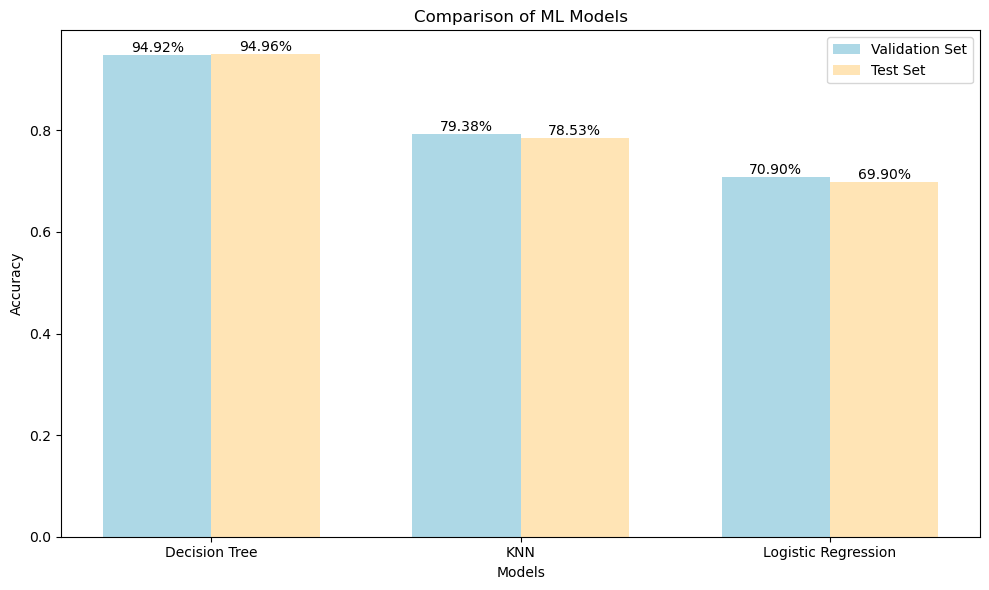

In [29]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'KNN', 'Logistic Regression']
validation_accuracies = [accuracy_dt, accuracy_knn, accuracy_lr]
test_accuracies = [accuracy_test_dt, accuracy_test_knn, accuracy_test_lr]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

# Define light colors for validation and test sets
validation_color = '#ADD8E6'  # Light blue
test_color = '#FFE4B5'        # Light orange

plt.bar(index, validation_accuracies, bar_width, label='Validation Set', color=validation_color)
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Set', color=test_color)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Add text labels for accuracy values
for i, val in enumerate(validation_accuracies):
    plt.text(i, val, f'{val*100:.2f}%', ha='center', va='bottom')

for i, val in enumerate(test_accuracies):
    plt.text(i + bar_width, val, f'{val*100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

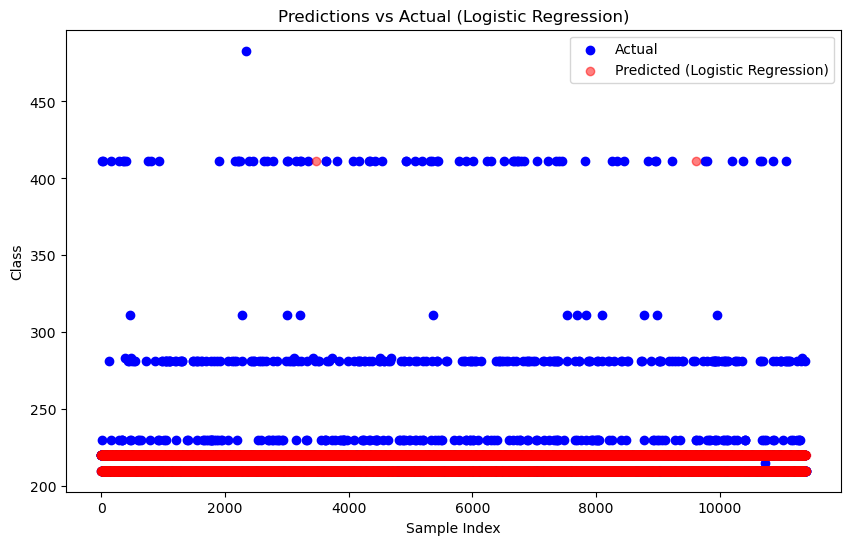

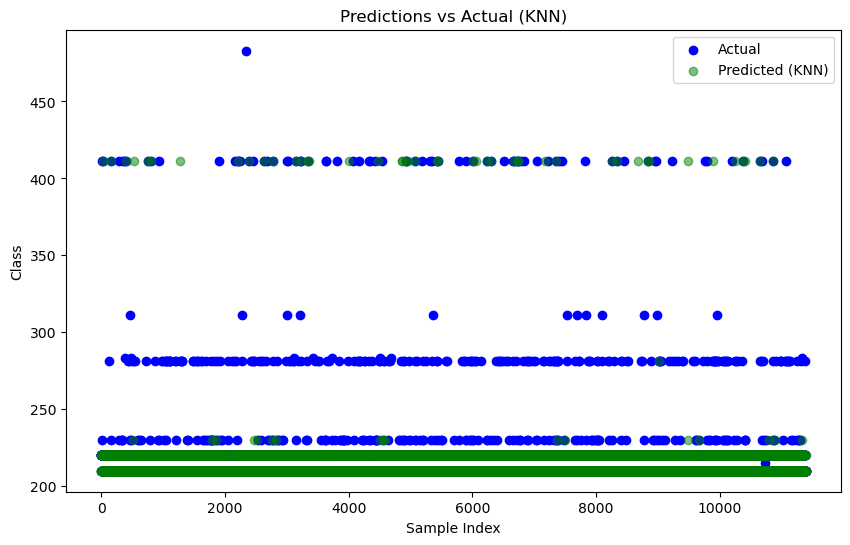

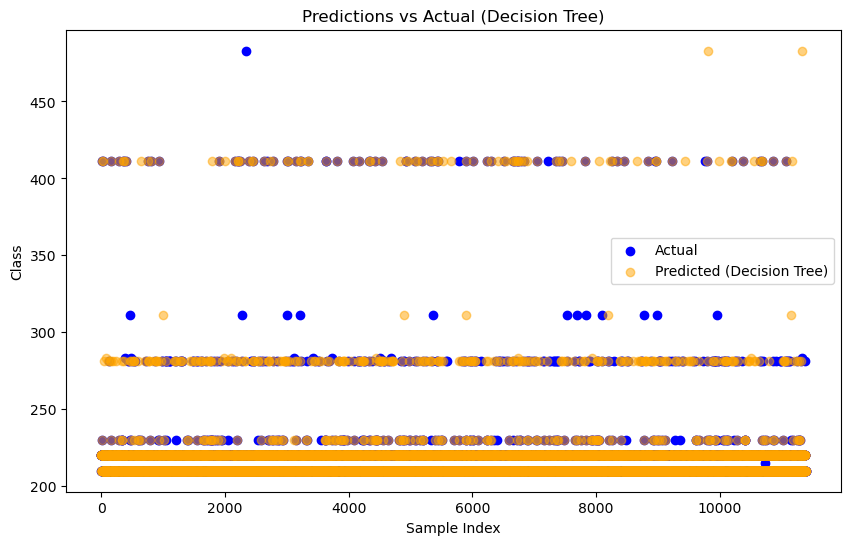

In [30]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual for Logistic Regression
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, label='Actual', color='blue')
plt.scatter(range(len(Y_test)), Y_test_pred_lr, label='Predicted (Logistic Regression)', color='red', alpha=0.5)
plt.title('Predictions vs Actual (Logistic Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Plotting predictions vs actual for KNN
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, label='Actual', color='blue')
plt.scatter(range(len(Y_test)), Y_test_pred_knn, label='Predicted (KNN)', color='green', alpha=0.5)
plt.title('Predictions vs Actual (KNN)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Plotting predictions vs actual for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, label='Actual', color='blue')
plt.scatter(range(len(Y_test)), Y_test_pred_dt, label='Predicted (Decision Tree)', color='orange', alpha=0.5)
plt.title('Predictions vs Actual (Decision Tree)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Step 3 :
## 1. TENSORS

In [31]:
import torch
import numpy as np

In [32]:
#Tensor Initialization
# Directly from data
data = [[7, 8], [9, 10]]
x_data = torch.tensor(data)

In [33]:
#From Numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [34]:
# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3953, 0.6093],
        [0.8084, 0.3667]]) 



In [35]:
#With random or constant values
shape = (3, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4456, 0.9673, 0.0143],
        [0.8097, 0.6716, 0.9609],
        [0.0577, 0.0688, 0.2366]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [36]:
tensor = torch.rand(2, 3)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [37]:
#Tensor Operations
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [38]:
tensor = torch.ones(6, 6)
tensor[:,2] = 0
print(tensor)

tensor([[1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.]])


In [39]:
t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.]])


In [40]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.]])


In [41]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.]]) 

tensor @ tensor.T 
 tensor([[5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5.]])


In [42]:
print(tensor, "\n")
tensor.add_(3)
print(tensor)

tensor([[1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1.]]) 

tensor([[4., 4., 3., 4., 4., 4.],
        [4., 4., 3., 4., 4., 4.],
        [4., 4., 3., 4., 4., 4.],
        [4., 4., 3., 4., 4., 4.],
        [4., 4., 3., 4., 4., 4.],
        [4., 4., 3., 4., 4., 4.]])


In [43]:
t = torch.ones(3)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1.])
n: [1. 1. 1.]


In [44]:
t.add_(2)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3.])
n: [3. 3. 3.]


In [45]:
n = np.ones(5)
t = torch.from_numpy(n)

In [46]:
np.add(n, 2, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
n: [3. 3. 3. 3. 3.]


## 2. A GENTLE INTROCUTION TO torch.autograd

In [47]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [48]:
prediction = model(data) # forward pass

In [49]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [50]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [51]:
optim.step() #gradient descent

In [52]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [53]:
Q = 3*a**3 - b**2

In [54]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [55]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [56]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [57]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [58]:
model.fc = nn.Linear(512, 10)

In [59]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

## 3. Neural Networks

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [61]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [62]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0896,  0.0666, -0.0399,  0.0110,  0.1057,  0.0037,  0.0332,  0.0205,
         -0.0263,  0.0438]], grad_fn=<AddmmBackward0>)


In [63]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [64]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5820, grad_fn=<MseLossBackward0>)


In [65]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [66]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0109, -0.0173,  0.0070,  0.0063, -0.0126,  0.0058])


## 4. Training a Classifier

Files already downloaded and verified
Files already downloaded and verified


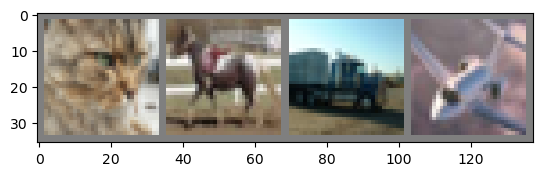

cat   horse truck plane
[1,  2000] loss: 2.169
[1,  4000] loss: 1.850
[1,  6000] loss: 1.716
[1,  8000] loss: 1.600
[1, 10000] loss: 1.536
[1, 12000] loss: 1.493
[2,  2000] loss: 1.434
[2,  4000] loss: 1.380
[2,  6000] loss: 1.379
[2,  8000] loss: 1.331
[2, 10000] loss: 1.299
[2, 12000] loss: 1.261
Finished Training


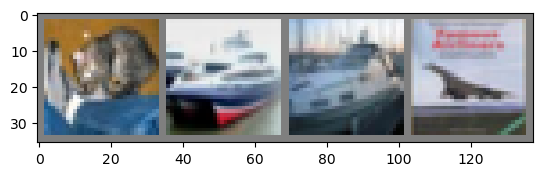

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   car   car   plane
Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 47.9 %
Accuracy for class: car   is 64.6 %
Accuracy for class: bird  is 41.1 %
Accuracy for class: cat   is 30.7 %
Accuracy for class: deer  is 51.0 %
Accuracy for class: dog   is 38.5 %
Accuracy for class: frog  is 64.5 %
Accuracy for class: horse is 71.3 %
Accuracy for class: ship  is 67.0 %
Accuracy for class: truck is 77.9 %
cpu


In [67]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

## Hyperparameters tuning

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define batch size
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# NN architecture
class Net(nn.Module):
    def __init__(self, conv_layers, fc_layers, activation):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, conv_layers[0], 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(conv_layers[0], conv_layers[1], 5)
        self.fc1 = nn.Linear(conv_layers[1] * 5 * 5, fc_layers[0])
        self.fc2 = nn.Linear(fc_layers[0], fc_layers[1])
        if len(fc_layers) > 2:
            self.fc3 = nn.Linear(fc_layers[1], fc_layers[2])
        self.activation = activation

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        if hasattr(self, 'fc3'):
            x = self.fc3(x)
        return x

# Define hyperparameters sets
hyperparams_sets = [
    {"architecture": "set1", "conv_layers": [6, 16], "fc_layers": [120, 84], "activation": F.relu, "optimizer": optim.SGD, "lr": 0.001},
    {"architecture": "set2", "conv_layers": [8, 16, 32], "fc_layers": [256, 128], "activation": F.leaky_relu, "optimizer": optim.Adam, "lr": 0.001},
    {"architecture": "set3", "conv_layers": [8, 16], "fc_layers": [128, 64, 32], "activation": torch.tanh, "optimizer": optim.RMSprop, "lr": 0.001}
]

# Training and testing loop for each hyperparameters set
for hyperparams in hyperparams_sets:
    print(f"Training with Hyperparameters Set {hyperparams['architecture']}...")
    
    # Initialize neural network
    net = Net(hyperparams['conv_layers'], hyperparams['fc_layers'], hyperparams['activation'])
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = hyperparams['optimizer'](net.parameters(), lr=hyperparams['lr'])
    
    # Training loop
    for epoch in range(2):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
    print('Finished Training')

    # Testing loop
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

    # Class-wise accuracy calculation
    class_correct = list(0. for _ in range(10))
    class_total = list(0. for _ in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f} %')

    print("\n")

# Checking CUDA availability
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Files already downloaded and verified
Files already downloaded and verified
Training with Hyperparameters Set set1...
[1,  2000] loss: 4.194
[1,  4000] loss: 3.246
[1,  6000] loss: 2.885
[1,  8000] loss: 2.855
[1, 10000] loss: 2.350
[1, 12000] loss: 1.987
[2,  2000] loss: 1.887
[2,  4000] loss: 1.829
[2,  6000] loss: 1.798
[2,  8000] loss: 1.729
[2, 10000] loss: 1.685
[2, 12000] loss: 1.652
Finished Training
Accuracy of the network on the 10000 test images: 42.23 %
Accuracy of plane: 51.10 %
Accuracy of car: 34.40 %
Accuracy of bird: 19.90 %
Accuracy of cat: 22.30 %
Accuracy of deer: 29.40 %
Accuracy of dog: 28.60 %
Accuracy of frog: 69.00 %
Accuracy of horse: 56.50 %
Accuracy of ship: 50.50 %
Accuracy of truck: 60.60 %


Training with Hyperparameters Set set2...
[1,  2000] loss: 1.937
[1,  4000] loss: 1.615
[1,  6000] loss: 1.485
[1,  8000] loss: 1.424
[1, 10000] loss: 1.372
[1, 12000] loss: 1.333
[2,  2000] loss: 1.248
[2,  4000] loss: 1.216
[2,  6000] loss: 1.192
[2,  8000] loss: 1.

## 4. Shallow NN

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('preprocessed_data.csv')

In [70]:
data.head()

,SBL,Tax District,Print Key,Front,Depth,Property Class,Previous Property Class,Owner1,House Number,Street,...,Heat Type,Basement Type,# of Stories,# of Fireplaces,# of Beds,# of Baths,# of Kitchens,Council District,Police District,Census Tract
0,1016500006006110,147012,101.65-6-6.11,45.0,107.3,210,210.0,jones gloria,97,wex,...,2,3,1.5,0,3,1.0,1,lovejoy,district c,30002.0
1,1013000001014000,147011,101.30-1-14,30.0,140.0,220,220.0,grayson mary,24,carl,...,2,3,1.5,0,5,2.0,2,masten,district e,34002.0
2,1124000002030000,147012,112.40-2-30,60.0,125.0,220,220.0,luke florence,203,central,...,2,2,2.0,0,5,2.0,2,lovejoy,district c,24005.0
3,1124200005043000,147012,112.42-5-43,30.0,134.0,210,210.0,porzio anthony l & w,217,gold,...,3,4,2.0,1,4,1.1,1,lovejoy,district c,24003.0
4,1238100004005000,147014,123.81-4-5,35.0,110.0,220,220.0,delaney l f & w,95,geary,...,2,4,2.0,0,6,2.0,2,south,district a,10005.0


In [71]:
# Selecting target variable (Y) and features (X)
target_variable = 'Property Class'
features=['# of Kitchens','First Story Area', '# of Beds', 'Sale Price', 'Second Story Area', 'House Number']
#'Land Value','Property Class','Second Story Area', '# of Beds',
Y = data[target_variable]
X = data[features]

# Displaying the first few rows of the target variable and features
print("Target Variable (Y):")
print(Y.head())
print("\nFeatures (X):")
print(X.head())

Target Variable (Y):
0    210
1    220
2    220
3    210
4    220
Name: Property Class, dtype: int64

Features (X):
   # of Kitchens  First Story Area  # of Beds  Sale Price  Second Story Area  \
0              1               908          3           0                  0   
1              2              1515          5           0                  0   
2              2              1332          5           0               1200   
3              1              1192          4           0                882   
4              2              1233          6           0               1219   

   House Number  
0            97  
1            24  
2           203  
3           217  
4            95  


In [72]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (45548, 6) (45548,)
Testing set shape: (11387, 6) (11387,)


In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Select features and target variable
target_variable = 'Property Class'
features = ['# of Kitchens', 'First Story Area', '# of Beds', 'Sale Price', 'Second Story Area', 'House Number']

# Filter the dataset to include only the selected features and target variable
filtered_data = data[features + [target_variable]]

# Filter data to include only unique Property Classes in the target variable
unique_classes = [210, 220, 281, 411, 283, 311, 230, 215, 483, 642]
filtered_data = filtered_data[filtered_data[target_variable].isin(unique_classes)]

# Convert categorical target variable to numerical labels
filtered_data[target_variable] = pd.Categorical(filtered_data[target_variable])
filtered_data[target_variable] = filtered_data[target_variable].cat.codes

# Split dataset into features and target variable
X = filtered_data[features]
y = filtered_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a shallow neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(len(features),)),
    Dense(10, activation='relu'),
    Dense(len(unique_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)




Epoch 1/50


1424/1424 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.9358
Epoch 2/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1575 - accuracy: 0.9679
Epoch 3/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1416 - accuracy: 0.9722
Epoch 4/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9724
Epoch 5/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1364 - accuracy: 0.9727
Epoch 6/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1354 - accuracy: 0.9728
Epoch 7/50
1424/1424 [==============================] - 4s 2ms/step - loss: 0.1347 - accuracy: 0.9729
Epoch 8/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1344 - accuracy: 0.9728
Epoch 9/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1340 - accuracy: 0.9729
Epoch 10/50
1424/1424 [==============================] - 3s 2ms/step - loss: 

In [74]:
model.save("property_class_prediction_model.h5")

C:\Users\shrig\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 392 (1.53 KB)
Trainable params: 392 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1302 - accuracy: 0.9728 - val_loss: 0.1297 - val_accuracy: 0.9748
Epoch 2/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.1297 - accuracy: 0.9731 - val_loss: 0.1298 - val_accuracy: 0.9745
Ep

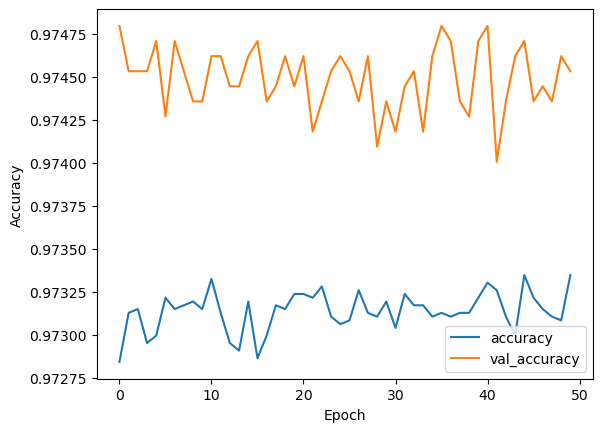

In [75]:
# Display the model structure
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()